# ***Prédiction de la maladie de Parkinson***

> Description : le but derrière ce problème de prédicition, est de pouvoir prédire si un patient est atteint de la maladie de Parkinson.

> Ainsi donc on est face à un problème de classification 

> Le dataset utilisé contient des enregistrements de 31 patients dont chaque patient à au moins 6 enregistements effectués.







In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv('parkinsons.data')

data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


> L'outil utilisé pour l'analyse vocal du dataset est MDVP (Multidimensional Voice Program)

> Pour effectuer l'analyse il se base sur : 

*   instabilité de la fréquence ( outil de mesure de variation de la fréquence : Jiffer )

*   instabilité de l'amplitude ( outil de mesure de variation de  : Shimmer )

*   analyse du bruit ( outil de mesure de variation de  : HNR, NHR )
*   évaluation de phenomène transitoires parasites


In [ ]:
#nom des colonnes de dataset
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# la dimension de dataset
data.shape

(195, 24)

In [ ]:
# Le type des données
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
# Check NA values
data.isnull().sum().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc88f064b90>,
      dtype=object)

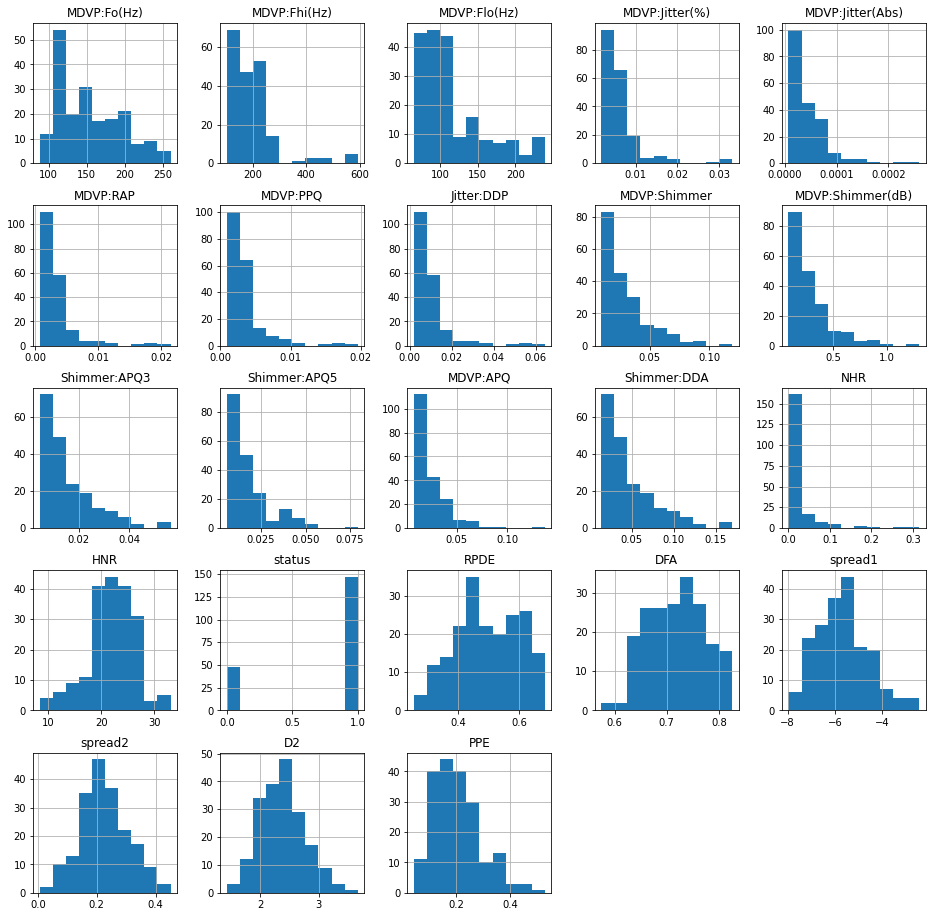

In [ ]:
data.hist(figsize=(16,16))

In [ ]:
# Verification des attributs manquants
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

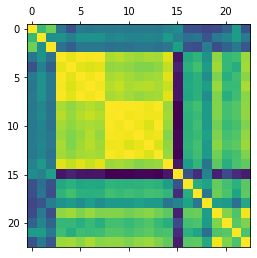

In [ ]:
# Correlation
plt.matshow(data.corr())
plt.show()


# **Selection de features et target**


In [ ]:
features = data.drop(columns=['name', 'status'], axis=1)
target = data['status']

In [ ]:
features

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
target

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [ ]:
#Avec la fonction suivante, nous pouvons sélectionner des caractéristiques hautement corrélées
#il supprimera la première caractéristique qui est corrélée avec toute autre caractéristique

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(features, 0.9)
len(set(corr_features))

11

In [ ]:
corr_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [ ]:
features = features.drop(corr_features, axis=1)

In [ ]:
# Dataset sans corrélation élevée entre les variables indépendantes
features.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180


# **Standarisation des données**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# transform data 
features = scaler.fit_transform(features)

In [ ]:
features

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.80132308,
         0.48047686, -0.21053082],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.47985265,
         1.31118546,  0.27507712],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.14144541,
         1.01768236, -0.10362861],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -1.01415428,
        -0.81807931,  0.78033848],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.97496019,
        -0.22906571, -0.63700298],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.03647134,
        -0.43085284,  0.45480231]])

# **Decoupage du dataset en trainset et testset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(156, 11) (39, 11)


**Modelling**




# **1.1. Modèle: XGBoost**

In [ ]:
#XGBoost est une implémentation d'arbres de décision Gradient Boosted
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Entrainement du model
model = XGBClassifier()
model.fit(X_train, Y_train)


XGBClassifier()

In [ ]:
# Prédiction du model avec le testset
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# Evaluation du model
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.62%


# **1.2. Modèle : XGBoost avec la validation croisée**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
model = XGBClassifier()
strat = StratifiedKFold(5)
cross_val_score(model, X_train, Y_train, cv=strat, scoring='accuracy')

array([0.84375   , 0.87096774, 0.93548387, 0.87096774, 0.93548387])

# **2.1 Modèle : Arbre de décision ( Decision tree )**

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
model = tree.DecisionTreeClassifier()
# Entrainement du model
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# Prédiction du model avec le testset
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# Evaluation du model
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.49%


# **2.2 Modèle : Arbre de décision avec la validation croisée**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn import tree
model = tree.DecisionTreeClassifier()
# avec StratifiedKFlod
strat = StratifiedKFold(5)
cross_val_score(model, X_train, Y_train, cv=strat, scoring='accuracy')

array([0.90625   , 0.90322581, 0.96774194, 0.90322581, 0.83870968])

In [ ]:
#avec KFold
cv = KFold(5)
cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')

array([0.8125    , 0.87096774, 0.96774194, 0.80645161, 0.87096774])

# **3.1 Modèle : Regression logistique**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Entrainement du model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Prédiction du model avec le testset
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# Evaluation du model
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.92%


# **3.2 Modèle : Regression logistique avec la validation croisée**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

strat = StratifiedKFold(5)
model = LogisticRegression(); 
cross_val_score(model, X_train, Y_train, cv=strat, scoring='accuracy')

array([0.8125    , 0.83870968, 0.87096774, 0.80645161, 0.83870968])

# **4.1 Modèle : K-plus proche voisin KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Entrainement du model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Prédiction du model avec le testset
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# Evaluation du model
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.05%


In [ ]:
#pour choisir le meilleure k 
val = 0.0;
bestK = 0;
scores = []

for k in range(1,20) : 
  model.fit(X_train, Y_train)
  scores.append(model.score(X_test, Y_test))
  if(val < model.score(X_test, Y_test) ) :
    val = model.score(X_test, Y_test)
    bestK = k

print("le meilleure  k ", bestK)
print("le meilleure score ", val)
scores

le meilleure  k  1
le meilleure score  0.8205128205128205


[0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205]

# **4.2 Modèle : K-plus proche voisin ( KNN ) avec la validation croisée**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

strat = StratifiedKFold(5)
model = KNeighborsClassifier(n_neighbors=2) 
cross_val_score(model, X_train, Y_train, cv=strat, scoring='accuracy')

array([0.875     , 0.96774194, 0.93548387, 0.93548387, 0.87096774])

# **Recapitulatif sur les resultats des differents modèle utiliser**

*   XGBoost :  Accuracy: 84.62%

*   Arbre de décision  : Accuracy: 79.49%
*   Regression logistique : 76.92%

*   K-plus proche voisin : Accuracy: 82.05%

Les modèles de classification qui donnent score superieur à 80% sont :  **XGBoost** et **K-plus proche voisin**
